In [1]:
#libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.cluster import DBSCAN
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from numpy import set_printoptions
from sklearn.decomposition import PCA

In [2]:
#dataset load
df = pd.read_csv('F:/Job apply Germany/EON/archive/credit_risk_dataset.csv')
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [3]:
#check missing data column wise
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [4]:
#check missing data row wise
df.isnull().any(axis=1).sum()

3943

In [5]:
#check abnormality in data
df.groupby('loan_intent').describe()

person_age                                               \
                       count       mean       std   min   25%   50%   75%   
loan_intent                                                                 
DEBTCONSOLIDATION     5212.0  27.606293  5.960468  20.0  23.0  26.0  30.0   
EDUCATION             6453.0  26.588099  5.979081  20.0  23.0  24.0  29.0   
HOMEIMPROVEMENT       3605.0  29.066574  5.831619  21.0  25.0  27.0  31.0   
MEDICAL               6071.0  27.998023  6.394447  20.0  24.0  26.0  31.0   
PERSONAL              5521.0  28.208477  7.263431  20.0  23.0  26.0  30.0   
VENTURE               5719.0  27.568456  6.179672  20.0  23.0  26.0  30.0   

                         person_income                ... loan_percent_income  \
                     max         count          mean  ...                 75%   
loan_intent                                           ...                       
DEBTCONSOLIDATION   70.0        5212.0  66470.876247  ...                0.23   
EDUCATION          144.0        6453.0  64135.199132  ...                0.23   
HOMEIMPROVEMENT     65.0        3605.0  73549.470458  ...                0.22   
MEDICAL             94.0        6071.0  61437.227145  ...                0.23   
PERSONAL           144.0        5521.0  67864.141279  ...                0.23   
VENTURE            144.0        5719.0  66386.574576  ...                0.23   

                        cb_person_cred_hist_length                           \
                    max                      count      mean       std  min   
loan_intent                                                                   
DEBTCONSOLIDATION  0.71                     5212.0  5.719302  3.961975  2.0   
EDUCATION          0.77                     6453.0  5.160855  3.644098  2.0   
HOMEIMPROVEMENT    0.70                     3605.0  6.481831  4.049844  2.0   
MEDICAL            0.78                     6071.0  5.941690  4.047277  2.0   
PERSONAL           0.83                     5521.0  6.122804  4.598415  2.0   
VENTURE            0.71                     5719.0  5.726875  3.920810  2.0   

                                        
                   25%  50%  75%   max  
loan_intent                             
DEBTCONSOLIDATION  3.0  4.0  8.0  30.0  
EDUCATION          3.0  4.0  7.0  30.0  
HOMEIMPROVEMENT    3.0  6.0  9.0  30.0  
MEDICAL            3.0  4.0  8.0  30.0  
PERSONAL           3.0  4.0  8.0  30.0  
VENTURE            3.0  4.0  8.0  30.0  

[6 rows x 64 columns]

In [6]:
#get and remove duplicated values
j = df.duplicated()
df = df[~j]
df.duplicated().sum()

0

In [7]:
#Employment length missing value fix
employment_Length = df.groupby('person_age')['person_emp_length'].transform(np.mean)
df['person_emp_length'].fillna(employment_Length, inplace=True)

C:\Users\ashik\AppData\Local\Temp\ipykernel_7068\2046129063.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['person_emp_length'].fillna(employment_Length, inplace=True)


In [8]:
#loan interest rate missing value fix
loan_interest_rate = df.groupby('loan_amnt')['loan_int_rate'].transform(np.mean)
loan_interest_rate
df['loan_int_rate'].fillna(loan_interest_rate, inplace=True)
k = df['loan_int_rate'].isnull()
df = df[~k]
df.isnull().sum()

C:\Users\ashik\AppData\Local\Temp\ipykernel_7068\749105781.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['loan_int_rate'].fillna(loan_interest_rate, inplace=True)


person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

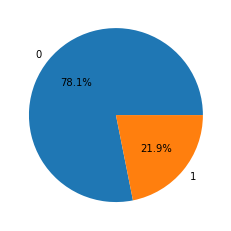

In [9]:
#Machine learning model implementation 
x = df.drop(labels= ['loan_status'], axis = 1)
y = df['loan_status']
x.describe()
y.describe()
percent = y.value_counts()/len(y) *100
plt.pie(percent,labels=('0','1'),autopct='%1.1f%%')
plt.show()

In [10]:
#one hot encoding 
transformer = make_column_transformer((OneHotEncoder(), ['loan_grade','person_home_ownership','loan_intent','cb_person_default_on_file']), remainder = 'passthrough')
transformed = transformer.fit_transform(x)
transformed_df = pd.DataFrame(
    transformed, 
    columns=transformer.get_feature_names()
)


C:\Users\ashik\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [11]:
transformed_df

,onehotencoder__x0_A,onehotencoder__x0_B,onehotencoder__x0_C,onehotencoder__x0_D,onehotencoder__x0_E,onehotencoder__x0_F,onehotencoder__x0_G,onehotencoder__x1_MORTGAGE,onehotencoder__x1_OTHER,onehotencoder__x1_OWN,...,onehotencoder__x2_VENTURE,onehotencoder__x3_N,onehotencoder__x3_Y,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,22.0,59000.0,123.0,35000.0,16.02,0.59,3.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,21.0,9600.0,5.0,1000.0,11.14,0.10,2.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,25.0,9600.0,1.0,5500.0,12.87,0.57,3.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,23.0,65500.0,4.0,35000.0,15.23,0.53,2.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,24.0,54400.0,8.0,35000.0,14.27,0.55,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32388,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,57.0,53000.0,1.0,5800.0,13.16,0.11,30.0
32389,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,54.0,120000.0,4.0,17625.0,7.49,0.15,19.0
32390,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,65.0,76000.0,3.0,35000.0,10.99,0.46,28.0
32391,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,56.0,150000.0,5.0,15000.0,11.48,0.10,26.0


In [12]:
#standardization data for kNN
scaler = StandardScaler()
scaled_features = scaler.fit_transform(transformed_df)

In [13]:
#kmeans 
kmeans = KMeans(init = "random", n_clusters = 2, n_init = 10, max_iter = 300)
kmeans.fit(scaled_features)
kmeans.labels_
confusion_matrix(y,kmeans.labels_)

array([[ 6927, 18385],
       [ 4301,  2780]], dtype=int64)

In [14]:
#print regular kmeans model performance
print('Precision: %.3f' % precision_score(y, kmeans.labels_))

print('Recall: %.3f' % recall_score(y, kmeans.labels_))

print('F1 Score: %.3f' % f1_score(y, kmeans.labels_))

print('Accuracy: %.3f' % accuracy_score(y, kmeans.labels_))
reg_kmeans = accuracy_score(y, kmeans.labels_)

Precision: 0.131
Recall: 0.393
F1 Score: 0.197
Accuracy: 0.300


In [15]:
#clustering performance 
kmeans_sill = silhouette_score(scaled_features, kmeans.labels_)
kmeans_sill

0.15863822345067563

In [16]:
#clustering performance by another model 
dbscan = DBSCAN(eps=0.3)
dbscan.fit(scaled_features)
dbscan_sill = silhouette_score(scaled_features, dbscan.labels_)
dbscan_sill

-0.2825728245089167

In [17]:
#feature selection 
test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(scaled_features, y)
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(scaled_features)
print(features[0:8,:])

[1.384e+03 2.772e+02 5.797e+00 3.665e+03 1.094e+03 3.404e+02 2.216e+02
 1.179e+03 5.354e+00 3.399e+02 1.946e+03 1.682e+02 9.953e+01 4.296e+01
 1.050e+02 1.475e+01 2.008e+02 1.078e+03 1.078e+03 1.723e+01 6.966e+02
 2.172e+02 3.613e+02 3.752e+03 5.452e+03 9.163e+00]
[[ 2.821  0.99   1.617  3.934]
 [-0.355 -1.011  0.04  -0.657]
 [-0.355 -1.011  0.599  3.746]
 [-0.355  0.99   1.362  3.372]
 [-0.355  0.99   1.051  3.559]
 [-0.355 -1.011 -1.253  0.748]
 [-0.355  0.99   0.454  2.622]
 [-0.355  0.99   0.03   2.528]]


In [18]:
#kmeans 
kmeans = KMeans(init = "random", n_clusters = 2, n_init = 10, max_iter = 300)
kmeans.fit(features)
kmeans.labels_
confusion_matrix(y,kmeans.labels_)

array([[ 1482, 23830],
       [ 2136,  4945]], dtype=int64)

In [19]:
#print feature selected kmeans model performance
print('Precision: %.3f' % precision_score(y, kmeans.labels_))

print('Recall: %.3f' % recall_score(y, kmeans.labels_))

print('F1 Score: %.3f' % f1_score(y, kmeans.labels_))

print('Accuracy: %.3f' % accuracy_score(y, kmeans.labels_))
feature_sel_kmeans = accuracy_score(y, kmeans.labels_)

Precision: 0.172
Recall: 0.698
F1 Score: 0.276
Accuracy: 0.198


In [20]:
#PCA
pca = PCA(n_components=3)
fit = pca.fit(scaled_features)
PCA_data = pca.fit_transform(scaled_features)
print("Explained Variance: %s" % fit.explained_variance_ratio_)
print(PCA_data)
pca_Df = pd.DataFrame(data = PCA_data
             , columns = ['principal component 1', 'principal component 2','principal component 3'])

Explained Variance: [0.129 0.087 0.072]
[[ 2.724  8.523  0.51 ]
 [-0.814 -1.691 -0.718]
 [ 0.771 -0.689 -0.325]
 ...
 [ 0.235  3.798  7.828]
 [-0.973  4.927  4.678]
 [-0.521  2.786  6.666]]


In [21]:
kmeans = KMeans(init = "random", n_clusters = 2, n_init = 10, max_iter = 300)
kmeans.fit(pca_Df)
kmeans.labels_
confusion_matrix(y,kmeans.labels_)


array([[21686,  3626],
       [ 4744,  2337]], dtype=int64)

In [22]:
#print PCA kmeans model performance
print('Precision: %.3f' % precision_score(y, kmeans.labels_))

print('Recall: %.3f' % recall_score(y, kmeans.labels_))

print('F1 Score: %.3f' % f1_score(y, kmeans.labels_))

print('Accuracy: %.3f' % accuracy_score(y, kmeans.labels_))
PCA_kmeans = accuracy_score(y, kmeans.labels_)

Precision: 0.392
Recall: 0.330
F1 Score: 0.358
Accuracy: 0.742


<BarContainer object of 3 artists>

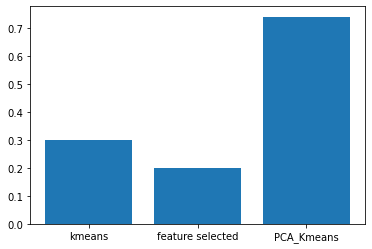

In [23]:
#comparison plot
xaxis = ['kmeans','feature selected','PCA_Kmeans']
yaxis = [reg_kmeans,feature_sel_kmeans,PCA_kmeans]
plt.bar(xaxis,yaxis)